In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
train=pd.read_csv(r"C:\Users\yarpi\Downloads\archive (2).zip")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
train.shape

(418, 12)

In [6]:
train=train.drop(columns="Cabin",axis=1)

In [7]:
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [8]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [9]:
train['Fare'].fillna(train['Fare'].mean(),inplace=True)

In [10]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
#Getting some stastical measure
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
#Finding number of people survive
train['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [13]:
train['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

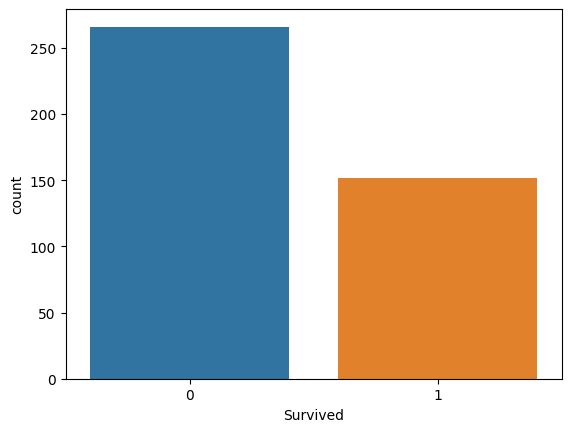

In [14]:
sns.countplot(x="Survived",data=train)

In [15]:
train['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

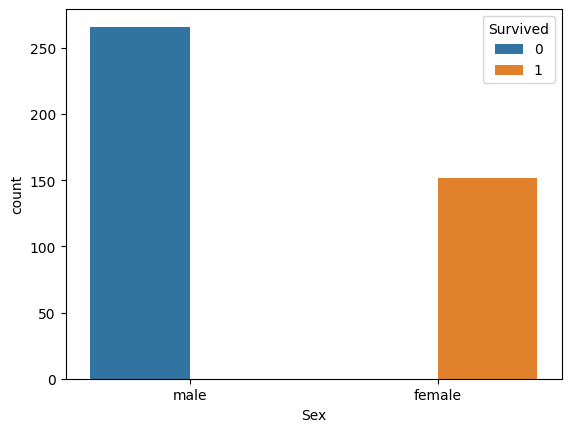

In [16]:
# No. of surviver gender wise
sns.countplot(x="Sex",hue='Survived',data=train)

<Axes: xlabel='Pclass', ylabel='count'>

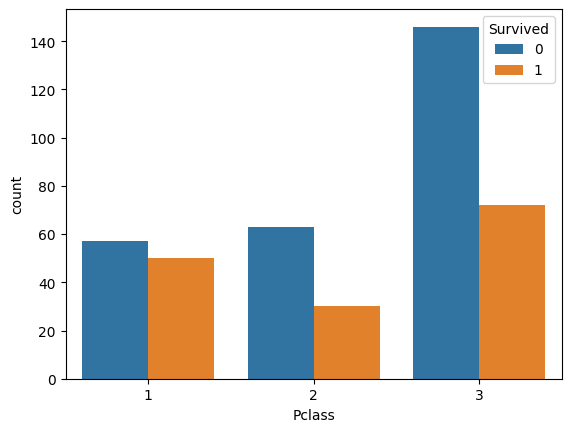

In [16]:
sns.countplot(x="Pclass",hue="Survived",data=train)

<Axes: xlabel='Pclass', ylabel='count'>

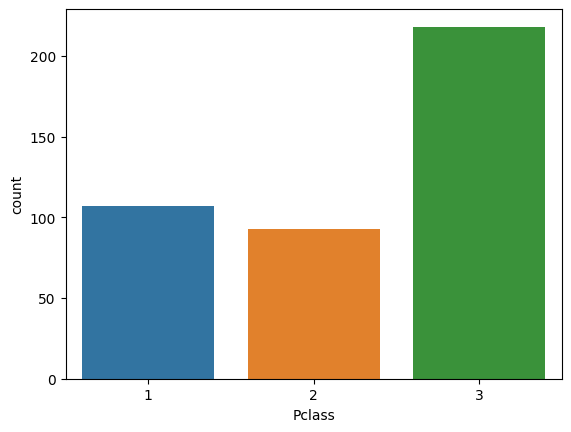

In [17]:
sns.countplot(x="Pclass",data=train)

<Axes: ylabel='Age'>

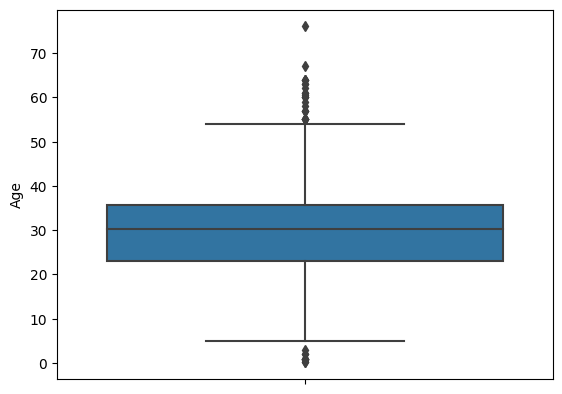

In [18]:
sns.boxplot(data=train,y='Age')

In [19]:
train.groupby('Pclass').Age.median()

Pclass
1    39.0
2    28.0
3    29.5
Name: Age, dtype: float64

<Axes: xlabel='Pclass', ylabel='Age'>

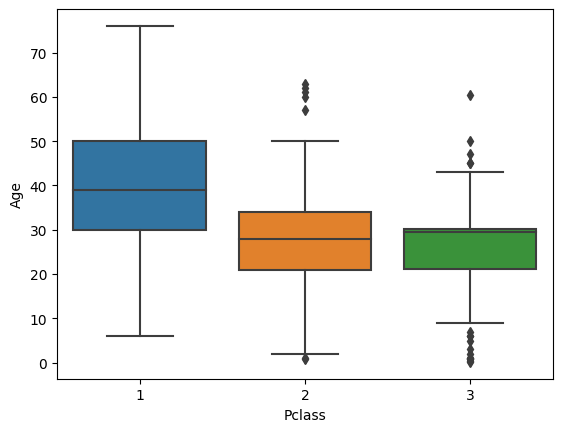

In [20]:
sns.boxplot(data=train,x='Pclass',y='Age')

<Axes: xlabel='Pclass', ylabel='Age'>

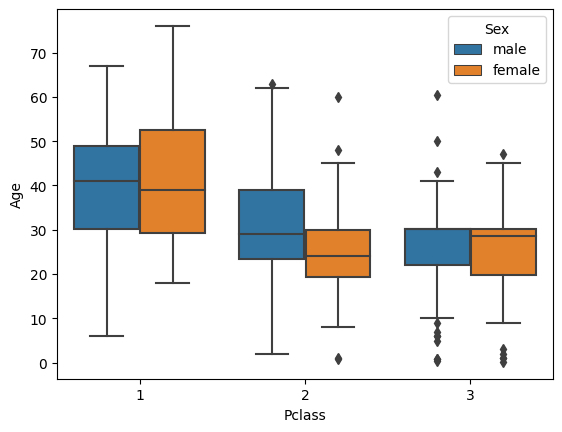

In [21]:
sns.boxplot(data=train,x='Pclass',y='Age',hue='Sex')

<Axes: xlabel='SibSp', ylabel='count'>

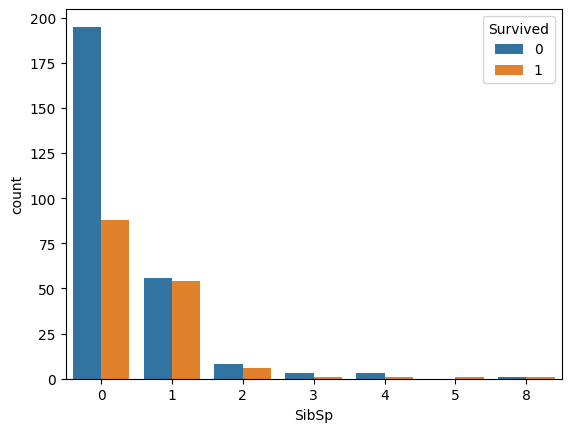

In [22]:
sns.countplot(data=train,x='SibSp',hue='Survived')

<Axes: xlabel='Age', ylabel='Density'>

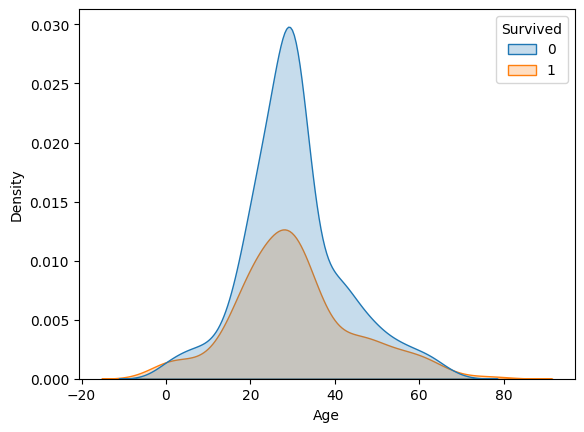

In [23]:
sns.kdeplot(data=train,x='Age',hue='Survived',fill=True)

# Fare

In [24]:
train.groupby('Survived').Fare.median()

Survived
0    13.0000
1    21.5125
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Density'>

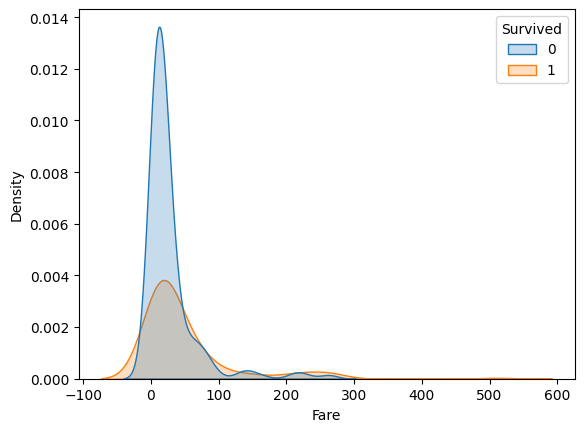

In [26]:
sns.kdeplot(data=train,x='Fare',hue='Survived',fill=True)

<Axes: xlabel='Survived', ylabel='Fare'>

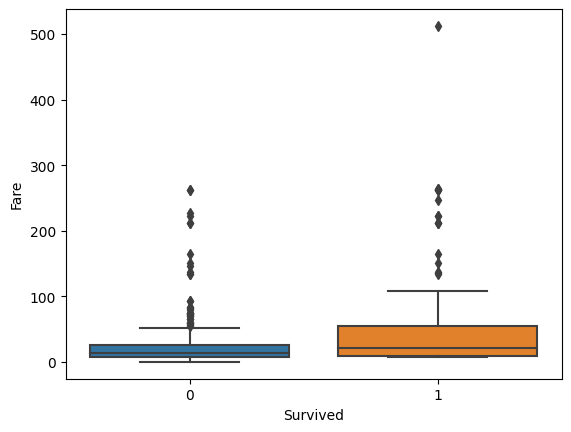

In [25]:
sns.boxplot(data=train,x='Survived',y='Fare')

# Ticket

In [27]:
ticket=train.Ticket.value_counts(dropna=False)
ticket

Ticket
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: count, Length: 363, dtype: int64

In [28]:
ticket[ticket!=1]

Ticket
PC 17608              5
CA. 2343              4
113503                4
PC 17483              3
220845                3
347077                3
SOTON/O.Q. 3101315    3
C.A. 31029            3
16966                 3
230136                2
C.A. 33112            2
28220                 2
PC 17756              2
29103                 2
347072                2
W./C. 6607            2
CA 31352              2
CA 2144               2
2660                  2
112378                2
13508                 2
13695                 2
113781                2
315153                2
19950                 2
2650                  2
F.C.C. 13534          2
350405                2
C.A. 2315             2
13236                 2
24065                 2
A/5. 851              2
21228                 2
2662                  2
C 4001                2
11778                 2
33638                 2
12749                 2
36928                 2
13050                 2
S.O./P.P. 2           2
S.O.C. 14

In [29]:
group_list=list(ticket[ticket!=1].index)
group_list

['PC 17608',
 'CA. 2343',
 '113503',
 'PC 17483',
 '220845',
 '347077',
 'SOTON/O.Q. 3101315',
 'C.A. 31029',
 '16966',
 '230136',
 'C.A. 33112',
 '28220',
 'PC 17756',
 '29103',
 '347072',
 'W./C. 6607',
 'CA 31352',
 'CA 2144',
 '2660',
 '112378',
 '13508',
 '13695',
 '113781',
 '315153',
 '19950',
 '2650',
 'F.C.C. 13534',
 '350405',
 'C.A. 2315',
 '13236',
 '24065',
 'A/5. 851',
 '21228',
 '2662',
 'C 4001',
 '11778',
 '33638',
 '12749',
 '36928',
 '13050',
 'S.O./P.P. 2',
 'S.O.C. 14879']

In [30]:
train['is_group']=train.Ticket.isin(group_list)*1
train['is_group']

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    0
415    0
416    0
417    0
Name: is_group, Length: 418, dtype: int32

<Axes: xlabel='is_group', ylabel='count'>

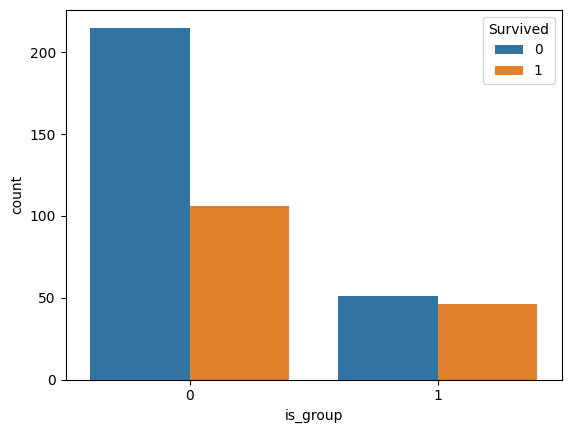

In [31]:
sns.countplot(data=train,x='is_group',hue='Survived')

In [32]:
train.Parch

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    0
415    0
416    0
417    1
Name: Parch, Length: 418, dtype: int64

In [33]:
train.Name

0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

In [34]:
train.Name.sample(10)

130                           Spinner, Mr. Henry John
70                          Mulvihill, Miss. Bertha E
361           Mallet, Mrs. Albert (Antoinette Magnin)
91                                 Pedersen, Mr. Olaf
412                    Henriksson, Miss. Jenny Lovisa
136                         Zakarian, Mr. Mapriededer
391    Lines, Mrs. Ernest H (Elizabeth Lindsey James)
286            Franklin, Mr. Charles (Charles Fardon)
89                        Wells, Master. Ralph Lester
259                          Midtsjo, Mr. Karl Albert
Name: Name, dtype: object

In [35]:
train.Name.str.extract('\w+\.\s(\w*\s*\w*)')

,0
0,James
1,James
2,Thomas Francis
3,Albert
4,Alexander
...,...
413,Woolf
414,Fermina
415,Simon Sivertsen
416,Frederick


In [36]:
train['Name'] =  train.Name.str.extract("\w+\.\s(\w*\s*\w*)" )
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group
0,892,0,3,James,male,34.50000,0,0,330911,7.8292,Q,0
1,893,1,3,James,female,47.00000,1,0,363272,7.0000,S,0
2,894,0,2,Thomas Francis,male,62.00000,0,0,240276,9.6875,Q,0
3,895,0,3,Albert,male,27.00000,0,0,315154,8.6625,S,0
4,896,1,3,Alexander,female,22.00000,1,1,3101298,12.2875,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,Woolf,male,30.27259,0,0,A.5. 3236,8.0500,S,0
414,1306,1,1,Fermina,female,39.00000,0,0,PC 17758,108.9000,C,0
415,1307,0,3,Simon Sivertsen,male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,1308,0,3,Frederick,male,30.27259,0,0,359309,8.0500,S,0


# Encoding to Categrocial columns

In [39]:

train['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [40]:
train['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [41]:
train.replace({"Sex":{'male':0,'female':1},"Embarked":{'S':0,'C':1,'Q':2}},inplace=True) 


In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group
0,892,0,3,James,0,34.5,0,0,330911,7.8292,2,0
1,893,1,3,James,1,47.0,1,0,363272,7.0000,0,0
2,894,0,2,Thomas Francis,0,62.0,0,0,240276,9.6875,2,0
3,895,0,3,Albert,0,27.0,0,0,315154,8.6625,0,0
4,896,1,3,Alexander,1,22.0,1,1,3101298,12.2875,0,0


In [43]:
A=train.drop(columns=["PassengerId","Name","Ticket","Survived"],axis=1)
B=train["Survived"]

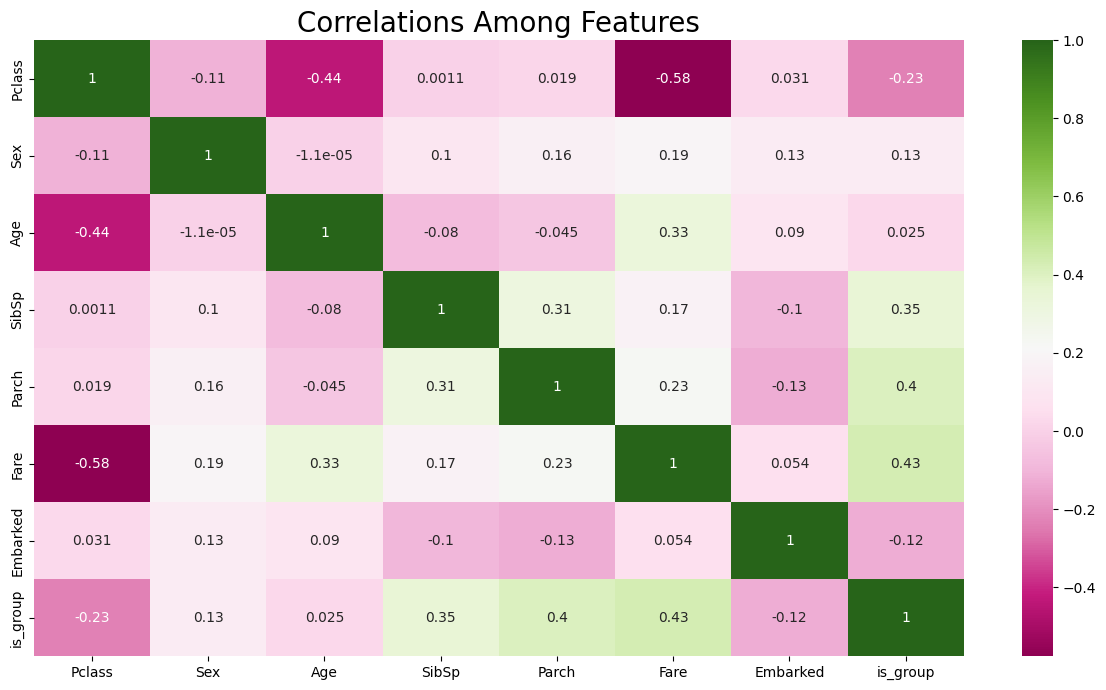

In [44]:
plt.subplots(figsize = (15,8))
sns.heatmap(A.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

In [45]:
print(A)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  is_group
0         3    0  34.50000      0      0    7.8292         2         0
1         3    1  47.00000      1      0    7.0000         0         0
2         2    0  62.00000      0      0    9.6875         2         0
3         3    0  27.00000      0      0    8.6625         0         0
4         3    1  22.00000      1      1   12.2875         0         0
..      ...  ...       ...    ...    ...       ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0         0
414       1    1  39.00000      0      0  108.9000         1         0
415       3    0  38.50000      0      0    7.2500         0         0
416       3    0  30.27259      0      0    8.0500         0         0
417       3    0  30.27259      1      1   22.3583         1         0

[418 rows x 8 columns]


In [46]:
print(B)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(A,B,test_size=0.2,random_state=2)

In [62]:
print(A.shape, X_train.shape, X_test.shape)

(418, 8) (334, 8) (84, 8)


# Logistic Regression Model

In [63]:
model=LogisticRegression()

In [64]:
model.fit(X_train,Y_train)

C:\Users\yarpi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
X_train_prediction=model.predict(X_train)

In [66]:
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [68]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('accuracy score of training data : ', training_data_accuracy)

accuracy score of training data :  1.0


In [69]:
scaler = StandardScaler()
scaler.fit(A)

StandardScaler()

In [70]:
#Dataset source:https://www.kaggle.com/datasets/brendan45774/test-file

This Project is made by Arpit Yadav during internship at codsoft